In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [32]:
df=pd.read_csv(r"D:\Python\Project\Customer-Personality-Analysis\marketing_campaign.csv",sep="\t").dropna()
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


# Cleaning And Preprocessing

In [33]:
# Making different List on Coloumn Namee

amount=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
place=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
promotion=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','NumDealsPurchases']


In [34]:
# Preprocess the Marital Status
df['Marital_Status']=df['Marital_Status'].replace({'Together':'Married','Alone':'Single'})

In [35]:
# Income is highly Skewed and have some Outliers

ul,ll=np.percentile(df['Income'],[97,3])
df['Income']=df['Income'].apply(lambda x: x if x<ul else ul)

df['Income']=df['Income'].apply(lambda x: x if x>ll else ll)

In [36]:
# Preprocess the Education Status
und=['Graduation','2n Cycle','Basic']
df['Education_sort']=df['Education'].apply(lambda x : 'Undergraduate' if x in und else 'PostGraduate')

In [37]:
# Total children in Home
df['Children']=df['Kidhome']+df['Teenhome']
df['Children'].value_counts()

Children
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

In [38]:
# Total Spent by Customer
df['TotalSpent']=df['MntFishProducts']+df['MntFruits']+df['MntGoldProds']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines']

In [39]:
# Calculating Age by Birth Year
df['age']=2024-df['Year_Birth']

In [40]:
# Treat the Outlier of the Age using IQR Methord
mu=df['age'].mean()
std=df['age'].std()
ul= mu+3*std

df['age']=df['age'].apply(lambda x: x if x<ul else ul)

In [41]:
# Making Bins Of Age
age_bins = [0, 35, 45, 55, 65, 75, float('inf')]
age_labels = ['Under 35', '35-45', '46-55', '56-65', '66-75', 'Over 75']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [42]:
# Creating a coloumn shows that whether the customer is a Parent or Not
df['Parent']= np.where(df['Children']>0,1,0)

df['Parent'].value_counts()

Parent
1    1583
0     633
Name: count, dtype: int64

# Data Visualization

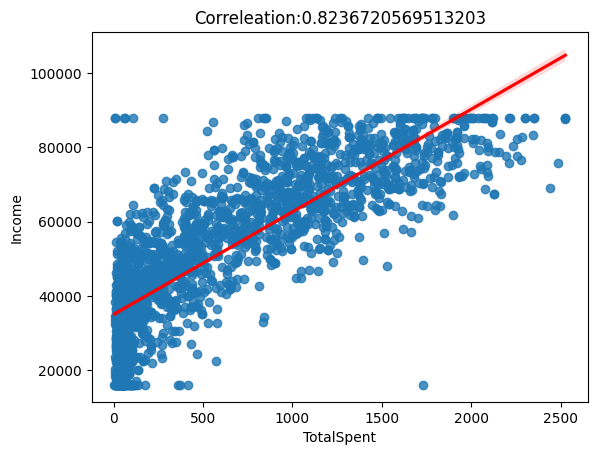

In [43]:
# Does the Income level depends on the Total spend

sns.regplot(x=df['TotalSpent'],y=df['Income'],line_kws={'color' :'Red'})
plt.title(f"Correleation:{df['TotalSpent'].corr(df['Income'])}")
plt.show()

#As we can see a positive correlation between them, we can say that as a person's income increases, their spending also tends to increase.

c:\Users\MY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


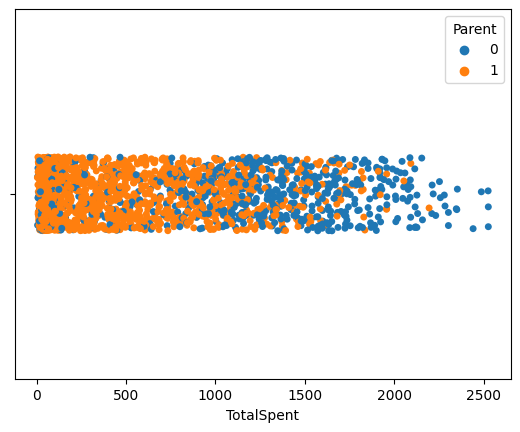

In [44]:
# Relation between there Expenditure and if they are parents or not

sns.stripplot(x=df['TotalSpent'], hue=df['Parent'])

plt.show()

# we can say that customer with 0 childern are spent more

C:\Users\MY\AppData\Local\Temp\ipykernel_5768\1168698308.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='age_group')['TotalSpent'].mean().plot(kind='bar')


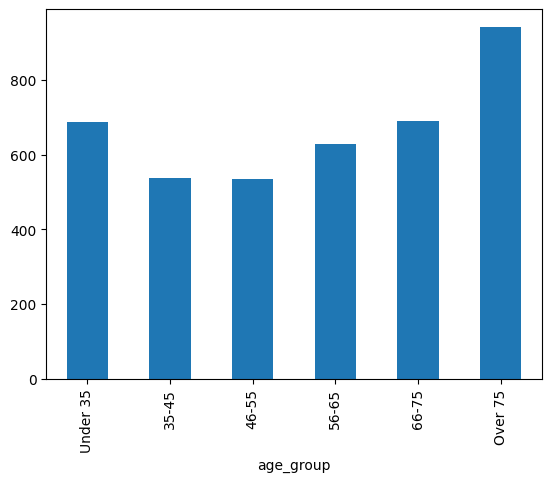

In [45]:
# Which age group is shopping most 

df.groupby(by='age_group')['TotalSpent'].mean().plot(kind='bar')
plt.show()

# People Above 75 is shopping the most 

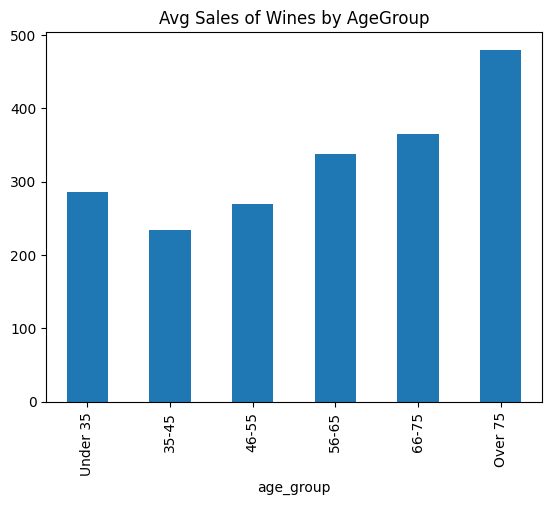

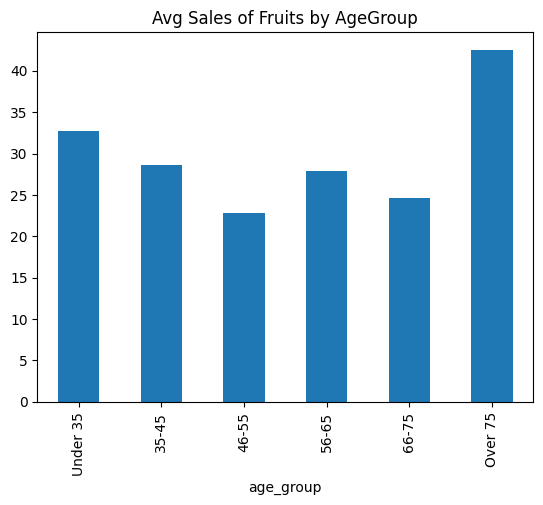

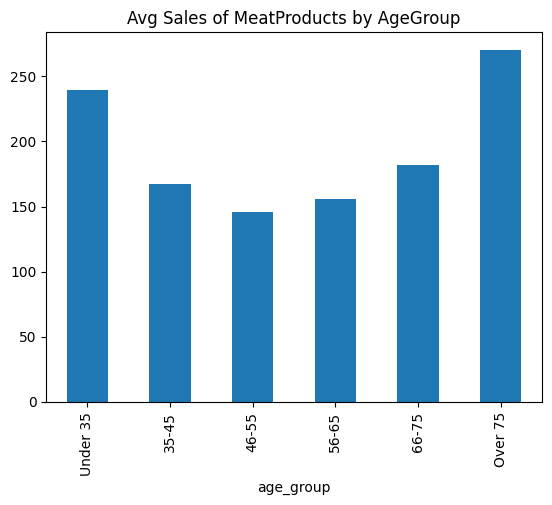

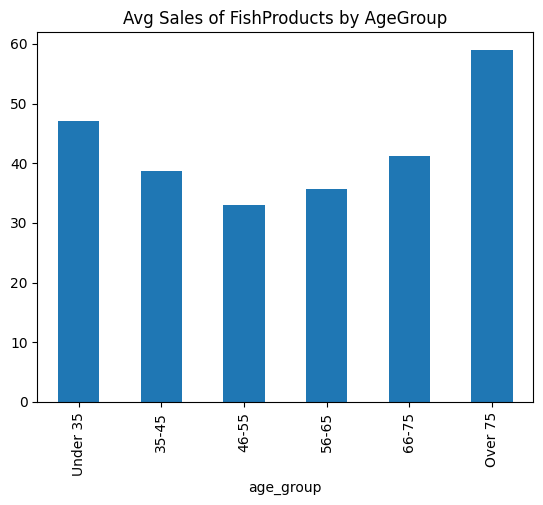

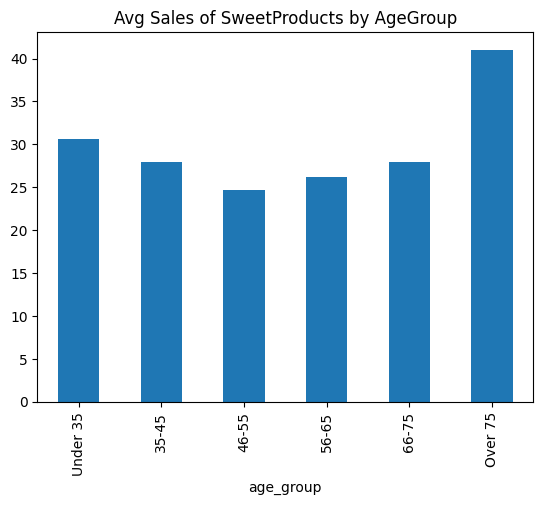

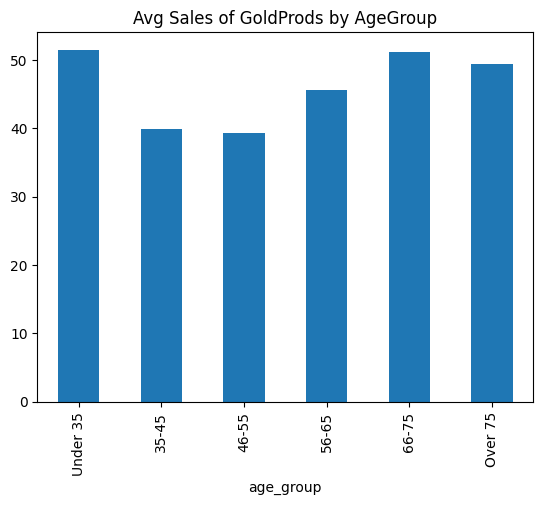

In [46]:
# Which Age Group Buy which product the most 
for i in amount:
    df.groupby(by='age_group',observed=True)[i].mean().plot(kind='bar')
    plt.title(f'Avg Sales of {i[3:]} by AgeGroup')
    plt.show()


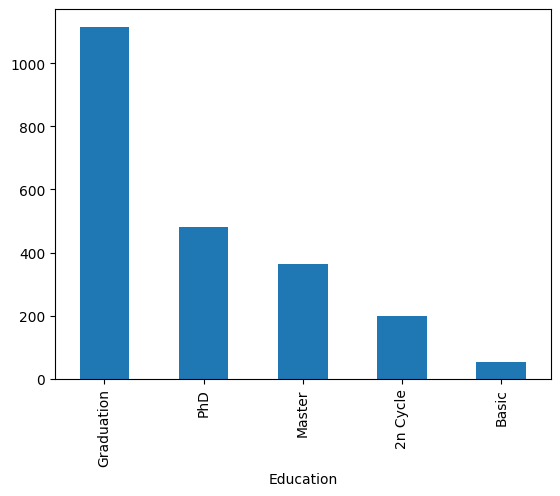

In [47]:
# Distribution of Customer based on Eductaion

df['Education'].value_counts().plot(kind='bar')
plt.show()

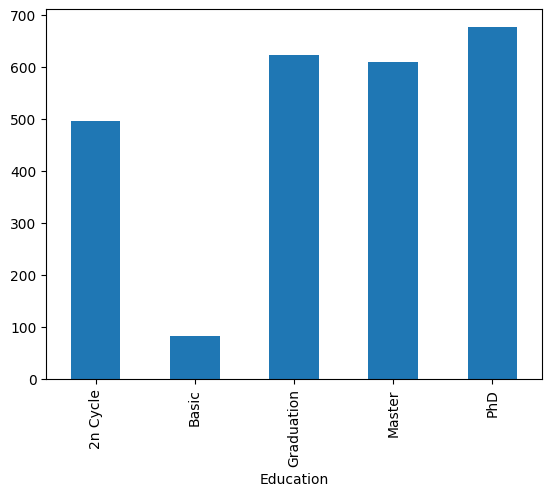

In [48]:
df.groupby('Education')['TotalSpent'].mean().plot(kind='bar')
plt.show()

c:\Users\MY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


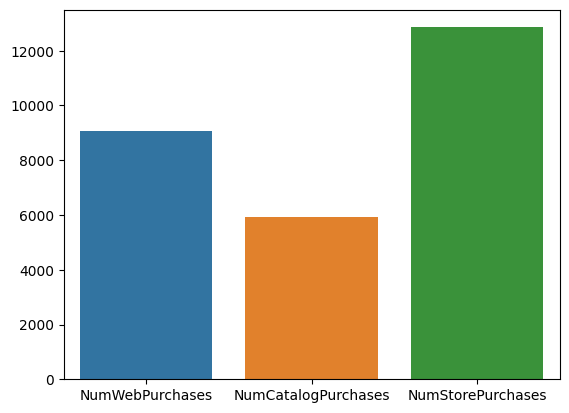

In [65]:
# Total orders by Web purchase , Catlog Purchase and Store Purchase 

ls={}
for i in place:
    ls[i]=np.sum(df[i])


sns.barplot(x=list(ls.keys()),y=list(ls.values())) 
plt.show()

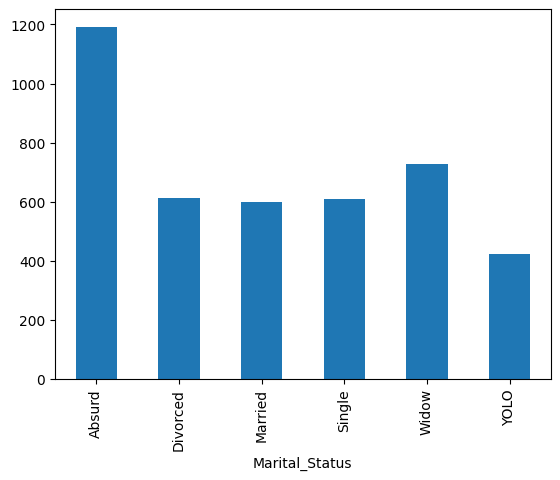

In [67]:
df.groupby('Marital_Status')['TotalSpent'].mean().plot(kind='bar')
plt.show()

### Conclusion


In our analysis above, we have concluded following:

Senior customers tend to buy more wines

Customers with higher incomes tend to buy more as compared to middle and low incomes. But the senior customer's tend to buy more.

Absurd and widowed customers tend to buy more than others, these two categories of customers based on their marital status buy more wines.

Customers have no children buy more as compared to those who have more children.

Customers with low incomes tend to visit web more frequently.

Most of the customer tend to make purchases by visit the store.
